In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
T1=27.4
T2=0.025
omega1=0.67
phi1=1.53
R1=196.9
R2=-0.033
omega2=0.65
phi2=1.99
B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma=1/365
R_L = 50
N=8557
M=10000
I_M0=None
I_H0=1000
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

In [3]:
print(f'População suscetível inicial: {S_H0} \nPopulação infectada inicial: {I_H0}')

População suscetível inicial: 7557 
População infectada inicial: 1000


In [4]:
def lotkavolterra(t, z, args):
    S, I, R = z
    
    # Funções de temperatura e chuva
    def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    # Duração da fase de desenvolvimento das larvas
    def tau_L(T):
        return 1 / (c1 * T + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(T):
        return np.exp(-1 / (A*T**2 + B*T + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(T):
        return np.exp(-(c1 * T + c2))
    
    def p_LR(R):
        return (4*p_ML/R_L**2) * R * (R_L - R)
    
    def p_LRT(R,T):
        return p_LR(R)*p_LT(T)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(R):
        return (4*p_ME/R_L**2) * R * (R_L - R)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(R):
        return (4*p_MP/R_L**2) * R * (R_L - R)

    # Duração do ciclo esporogônico
    def tau_M(T):
        return DD / (T - Tmin)

    # Definindo a função de sobrevivência do mosquito
    def l(tau_M, T):  
        p_T = p(T)
        return p_T**tau_M

    # Definindo a taxa de mortalidade do mosquito
    def mu(T):
        return -log(p(T))
    
    # Calcular a taxa de mordida e probabilidade de transmissão
    def a(T):
        return (T - T1) / D1
    
    def b(R,T):
        return B_E * p_ME * p_LRT(R_curr,T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)
    
    dSdt = -a * b2 * (I_M0 / N) * S
    dIdt = a * b2 * (I_M0 / N) * S - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt] 

In [5]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

In [6]:
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=(I_M0, N, gamma), dense_output=True)
sol

TypeError: lotkavolterra() takes 3 positional arguments but 5 were given

In [7]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return [a*x - b*x*y, -c*y + d*x*y]


In [8]:
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 470
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff0b357a90>
   status: 0
  success: True
        t: array([ 0.        ,  0.05573717,  0.20079817,  0.34290464,  0.49324333,
        0.71327321,  0.96769484,  1.3310762 ,  1.66297332,  2.01584196,
        2.39785934,  2.86334175,  3.42577701,  3.75497984,  3.99154881,
        4.21914842,  4.31236716,  4.4055859 ,  4.58646786,  4.75225717,
        4.91203619,  5.15218572,  5.4826018 ,  5.81145913,  6.15484299,
        6.51826717,  6.92707802,  7.47819674,  7.90122886,  8.21339516,
        8.43659215,  8.64507275,  8.79867076,  8.95226876,  9.10838041,
        9.3028147 ,  9.54701784,  9.87311478, 10.19921173, 10.54490389,
       10.91207689, 11.33136536, 11.89933709, 12.30230554, 12.56778348,
       12.79738185, 12.96717881, 13.13697577, 13.21014924, 13.2833227 ,
       13.4397804 , 13.61928959, 13.859

In [9]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return [dx, dy]

In [10]:
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 470
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff0b375590>
   status: 0
  success: True
        t: array([ 0.        ,  0.05573717,  0.20079817,  0.34290464,  0.49324333,
        0.71327321,  0.96769484,  1.3310762 ,  1.66297332,  2.01584196,
        2.39785934,  2.86334175,  3.42577701,  3.75497984,  3.99154881,
        4.21914842,  4.31236716,  4.4055859 ,  4.58646786,  4.75225717,
        4.91203619,  5.15218572,  5.4826018 ,  5.81145913,  6.15484299,
        6.51826717,  6.92707802,  7.47819674,  7.90122886,  8.21339516,
        8.43659215,  8.64507275,  8.79867076,  8.95226876,  9.10838041,
        9.3028147 ,  9.54701784,  9.87311478, 10.19921173, 10.54490389,
       10.91207689, 11.33136536, 11.89933709, 12.30230554, 12.56778348,
       12.79738185, 12.96717881, 13.13697577, 13.21014924, 13.2833227 ,
       13.4397804 , 13.61928959, 13.859

In [16]:
# Inicializando os parâmetros
num_steps = 365
dt = 1
t_initial = 0
t_final = num_steps * dt
T1 = 27.4
T2 = 0.025
omega1 = 0.67
phi1 = 1.53
R1 = 196.9
R2 = -0.033
omega2 = 0.65
phi2 = 1.99
B_E = 200
p_ME = 0.9
p_ML = 0.25
p_MP = 0.75
tau_E = 1
tau_P = 1
c1 = 0.00554
c2 = -0.06737
D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 105
Tmin = 14.5
gamma = 1/120
R_L = 50
N = 8557
M = 10000
I_M0 = M / 100
I_H0 = 1000
S_H0 = N - I_H0

In [13]:
# Definindo funções auxiliares
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def p_LT(T):
    return np.exp(-(c1 * T + c2))

def p_LR(R):
    return (4*p_ML/R_L**2) * R * (R_L - R)

def p_LRT(R,T):
    return p_LR(R)*p_LT(T)

def tau_M(T):
    return DD / (T - Tmin)

def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

def mu(T):
    return -np.log(p(T))

In [19]:
# Definindo a função do sistema de equações diferenciais
def dYdt(t, Y):
    S_H, I_H, R_H = Y
    T_curr = T(t)
    R_curr = R(t)
    tau_M_T = tau_M(T_curr)
    l_tau_M = l(tau_M_T, T_curr)
    a = (T_curr - T1) / D1
    b = B_E * p_ME * p_LRT(R_curr, T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H
        dI_H = a * b2 * (I_M0 / N) * S_H - gamma * I_H
    else:
        dS_H = -a * b2 * (I_H / N) * S_H
        dI_H = a * b2 * (I_H / N) * S_H - gamma * I_H
    dR_H = gamma * I_H

    return [dS_H, dI_H, dR_H]

In [20]:
# Solucionando o sistema de equações diferenciais
sol = solve_ivp(dYdt, [t_initial, t_final], [S_H0, I_H0, 0], t_eval=np.linspace(t_initial, t_final, num_steps))

In [21]:
# Extraindo as soluções
times = sol.t
S_H, I_H, R_H = sol.y

In [22]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
  

In [23]:
times

array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
        52.14285714,  53.1456044 ,  54.14835165,  55.1510989 ,
        56.15384615,  57.15659341,  58.15934066,  59.16208791,
        60.16483516,  61.16758242,  62.17032967,  63.17

In [24]:
S_H, I_H, R_H

(array([7557.        , 7556.9459998 , 7556.82339692, 7556.9965645 ,
        7557.46594108, 7557.98495454, 7558.36233765, 7558.46212811,
        7558.20366851, 7557.56160635, 7556.56589405, 7555.30178891,
        7553.90985317, 7552.58595395, 7551.58126329, 7551.20225813,
        7551.81072032, 7552.75238236, 7553.01078685, 7552.70089912,
        7551.93266301, 7550.80916742, 7549.42664629, 7547.87447859,
        7546.23518836, 7544.58444465, 7542.9910616 , 7541.51699836,
        7540.21735912, 7539.14039315, 7538.32749473, 7537.81320321,
        7537.62520295, 7537.7843234 , 7538.14756052, 7538.34861766,
        7538.34331909, 7538.10846506, 7537.62911573, 7536.89859115,
        7535.91847126, 7534.6985959 , 7533.25706482, 7531.62023764,
        7529.8227339 , 7527.90743301, 7525.9254743 , 7523.93625698,
        7522.00744016, 7520.21494285, 7518.64294395, 7517.38388225,
        7516.53845645, 7516.21562513, 7516.53260678, 7517.32176694,
        7517.83432176, 7518.11264109, 7518.24493

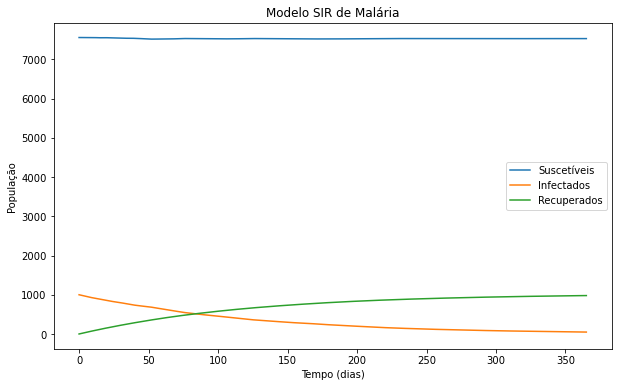

In [25]:
# Cria um gráfico com base no tempo e nos valores de S_H, I_H e R_H
plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

# Define os títulos dos eixos e o título do gráfico
plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

# Adiciona a legenda ao gráfico
plt.legend()

# Mostra o gráfico
plt.show()